<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part-2:-Numerical-features" data-toc-modified-id="Part-2:-Numerical-features-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Part 2: Numerical features</a></span><ul class="toc-item"><li><span><a href="#Assumptions-for-Multiple-Linear-Regression" data-toc-modified-id="Assumptions-for-Multiple-Linear-Regression-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Assumptions for Multiple Linear Regression</a></span></li><li><span><a href="#Loading-data-back" data-toc-modified-id="Loading-data-back-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Loading data back</a></span></li><li><span><a href="#Distribution" data-toc-modified-id="Distribution-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Distribution</a></span></li><li><span><a href="#Log-Transformation" data-toc-modified-id="Log-Transformation-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Log Transformation</a></span></li><li><span><a href="#Multicollinearity" data-toc-modified-id="Multicollinearity-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Multicollinearity</a></span><ul class="toc-item"><li><span><a href="#VIF-Test" data-toc-modified-id="VIF-Test-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>VIF Test</a></span></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Age-of-House-/-Age-of-Remodelling" data-toc-modified-id="Age-of-House-/-Age-of-Remodelling-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Age of House / Age of Remodelling</a></span></li></ul></li><li><span><a href="#Normalization" data-toc-modified-id="Normalization-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Normalization</a></span></li></ul></li></ul></div>

# Part 2: Numerical features

## Assumptions for Multiple Linear Regression
* Regression residuals must be normally distributed.
* A linear relationship is assumed between the dependent variable and the independent variables.
* The residuals are homoscedastic and approximately rectangular-shaped.
* Absence of multicollinearity is expected in the model, meaning that independent variables are not too highly correlated.
* No Autocorrelation of the residuals.

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import json

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # Render high resolution images

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Loading data back

In [36]:
# Load data
raw = pd.read_csv('data/clean_data.csv',
                  na_values="",  # There are no missing values in the clean data file.
                  keep_default_na=False  # "NA" strings are casted as actual values.
                 )
raw.head()

Condition 2 Garage Cond  Overall Qual Land Contour Heating  Enclosed Porch  \
0        Norm          TA             6          Lvl    GasA             0.0   
1        Norm          TA             7          Lvl    GasA             0.0   
2        Norm          TA             5          Lvl    GasA             0.0   
3        Norm          TA             5          Lvl    GasA             0.0   
4        Norm          TA             6          Lvl    GasA             0.0   

  Lot Shape  Kitchen AbvGr Garage Finish  Lot Area  ... Paved Drive Misc Val  \
0       IR1              1           RFn   13517.0  ...           Y      0.0   
1       IR1              1           RFn   11492.0  ...           Y      0.0   
2       Reg              1           Unf    7922.0  ...           Y      0.0   
3       Reg              1           Fin    9802.0  ...           Y      0.0   
4       IR1              1           Unf   14235.0  ...           N      0.0   

  Gr Liv Area SalePrice House Style  Street  TotRms AbvGrd Neighborhood  \
0      1479.0  130500.0      2Story    Pave              6       Sawyer   
1      2122.0  220000.0      2Story    Pave              8      SawyerW   
2      1057.0  109000.0      1Story    Pave              5        Names   
3      1444.0  174000.0      2Story    Pave              7       Timber   
4      1445.0  138500.0      1.5Fin    Pave              6      SawyerW   

   Fireplace Qu  Open Porch SF  
0            NA           44.0  
1            TA           74.0  
2            NA           52.0  
3            NA            0.0  
4            NA           59.0  

[5 rows x 79 columns]

In [37]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Condition 2      2022 non-null   object 
 1   Garage Cond      2022 non-null   object 
 2   Overall Qual     2022 non-null   int64  
 3   Land Contour     2022 non-null   object 
 4   Heating          2022 non-null   object 
 5   Enclosed Porch   2022 non-null   float64
 6   Lot Shape        2022 non-null   object 
 7   Kitchen AbvGr    2022 non-null   int64  
 8   Garage Finish    2022 non-null   object 
 9   Lot Area         2022 non-null   float64
 10  Bsmt Exposure    2022 non-null   object 
 11  Electrical       2022 non-null   object 
 12  Functional       2022 non-null   object 
 13  Alley            2022 non-null   object 
 14  Land Slope       2022 non-null   object 
 15  Fireplaces       2022 non-null   int64  
 16  Wood Deck SF     2022 non-null   float64
 17  Garage Type   

In [38]:
# Splitting data into various chunks so that it's easier to manage
idx_cols = ['Id', 'PID']

target = ['SalePrice']

cont_cols = ['Lot Area','Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
             '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area','Wood Deck SF', 'Open Porch SF',
             'Enclosed Porch','3Ssn Porch','Screen Porch','Pool Area','Misc Val']

disc_cols = ['Year Built', 'Year Remod/Add','Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath','Bedroom AbvGr',
             'Kitchen AbvGr','TotRms AbvGrd','Fireplaces','Garage Cars','Mo Sold','Yr Sold']

nom_cols = ['MS SubClass','MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1',
            'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl','Exterior 1st','Exterior 2nd', 
            'Mas Vnr Type','Foundation', 'Heating', 'Central Air', 'Electrical','Garage Type','Garage Finish','Paved Drive',
            'Fence','Misc Feature','Sale Type']

ord_cols = ['Lot Shape',  'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 
            'Bsmt Qual', 'Bsmt Cond' ,'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC','Kitchen Qual',
            'Functional','Fireplace Qu', 'Garage Qual', 'Garage Cond','Pool QC'  ]


new_cols = []

drop_cols = []

low_var_cols = []

In [39]:

df = raw.copy()  # Copy dataframe so that I maintain a untouched version so in case
target_df = df[target]
cont_df = df[cont_cols]
disc_df = df[disc_cols]


## Overview

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


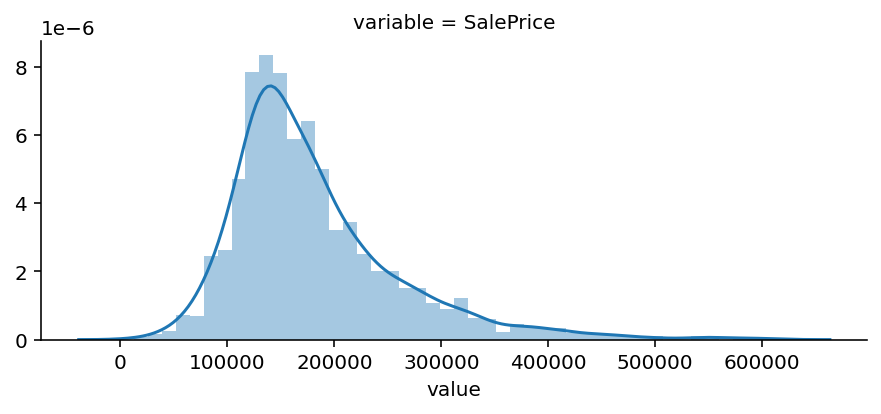

In [40]:
# Plotting distribution for target variable
f = pd.melt(df, value_vars = sorted(target))
g = sns.FacetGrid(data = f, col='variable', col_wrap=3, sharex = False, sharey = False, aspect=2)
g = g.map(sns.distplot, 'value')

Distribution of SalePrices looks right skewed. 

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

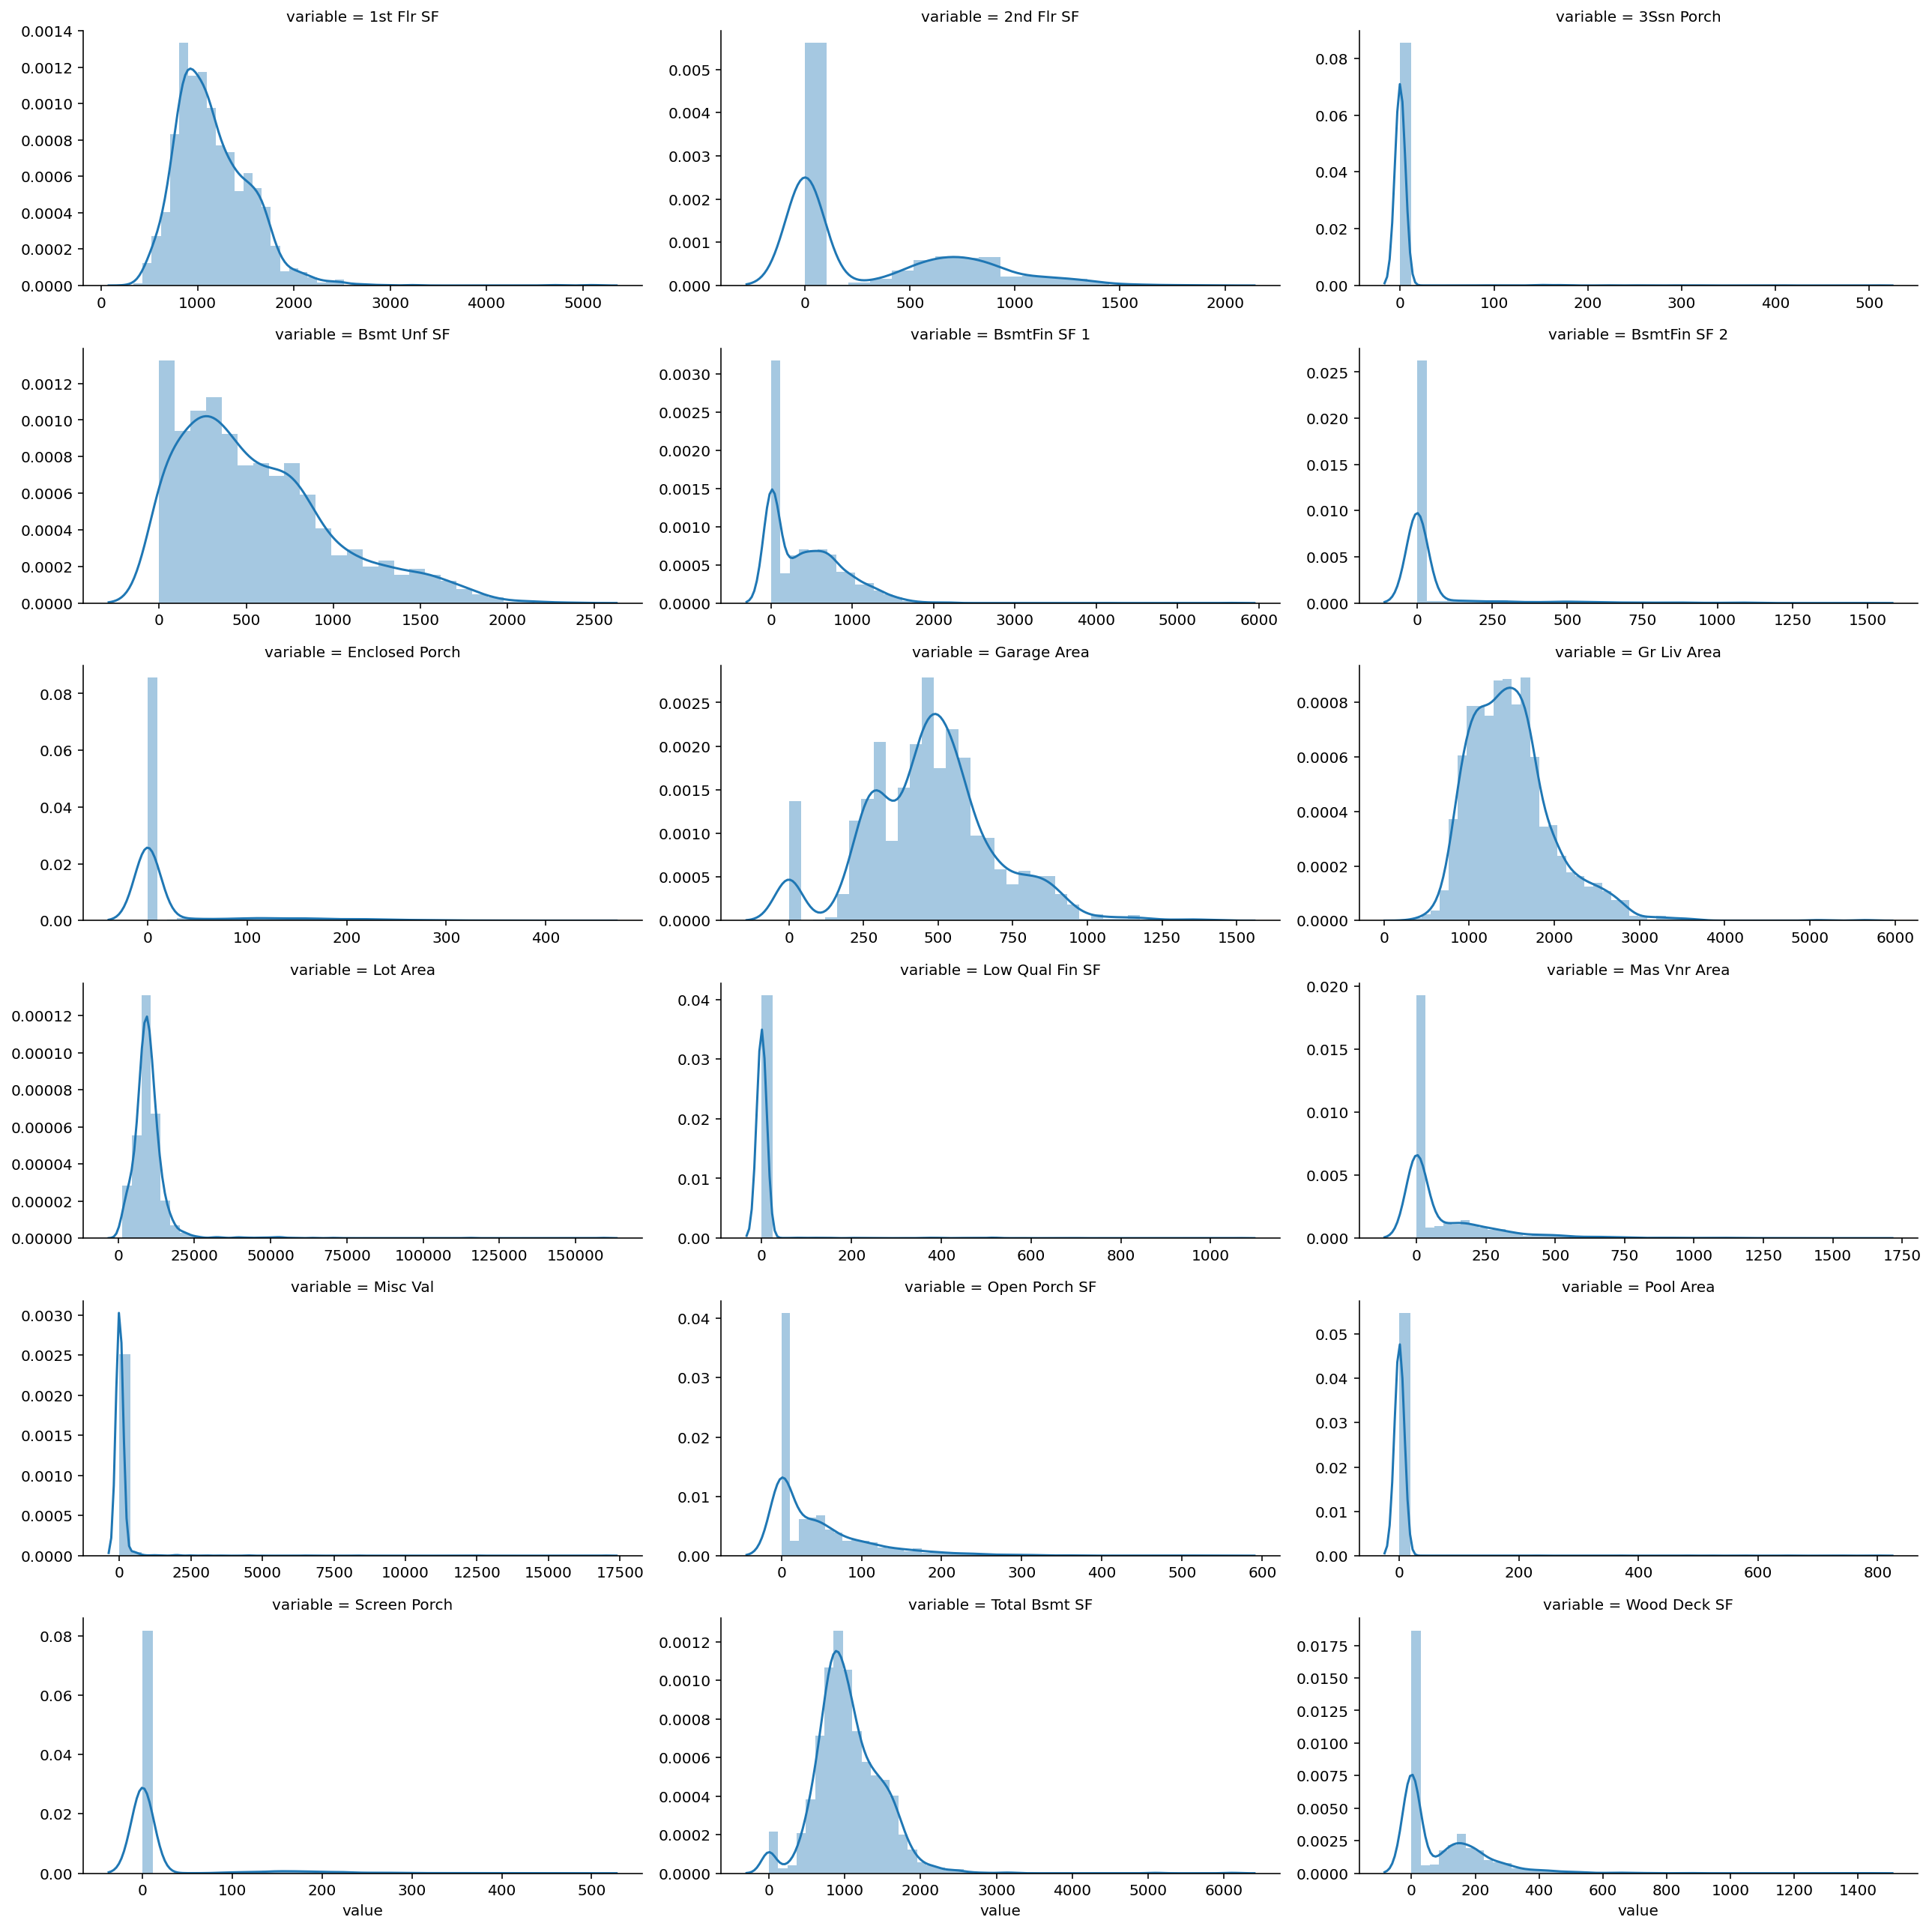

In [41]:
# Plotting distribution for continuous variables
f = pd.melt(df, value_vars = sorted(cont_cols))
g = sns.FacetGrid(data = f, col='variable', col_wrap=3, sharex = False, sharey = False, aspect=2)
g = g.map(sns.distplot, 'value')

Some of the distribution also look right skewed: 1st flr SF,  Bsmt Unf SF, Gr Liv Area

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

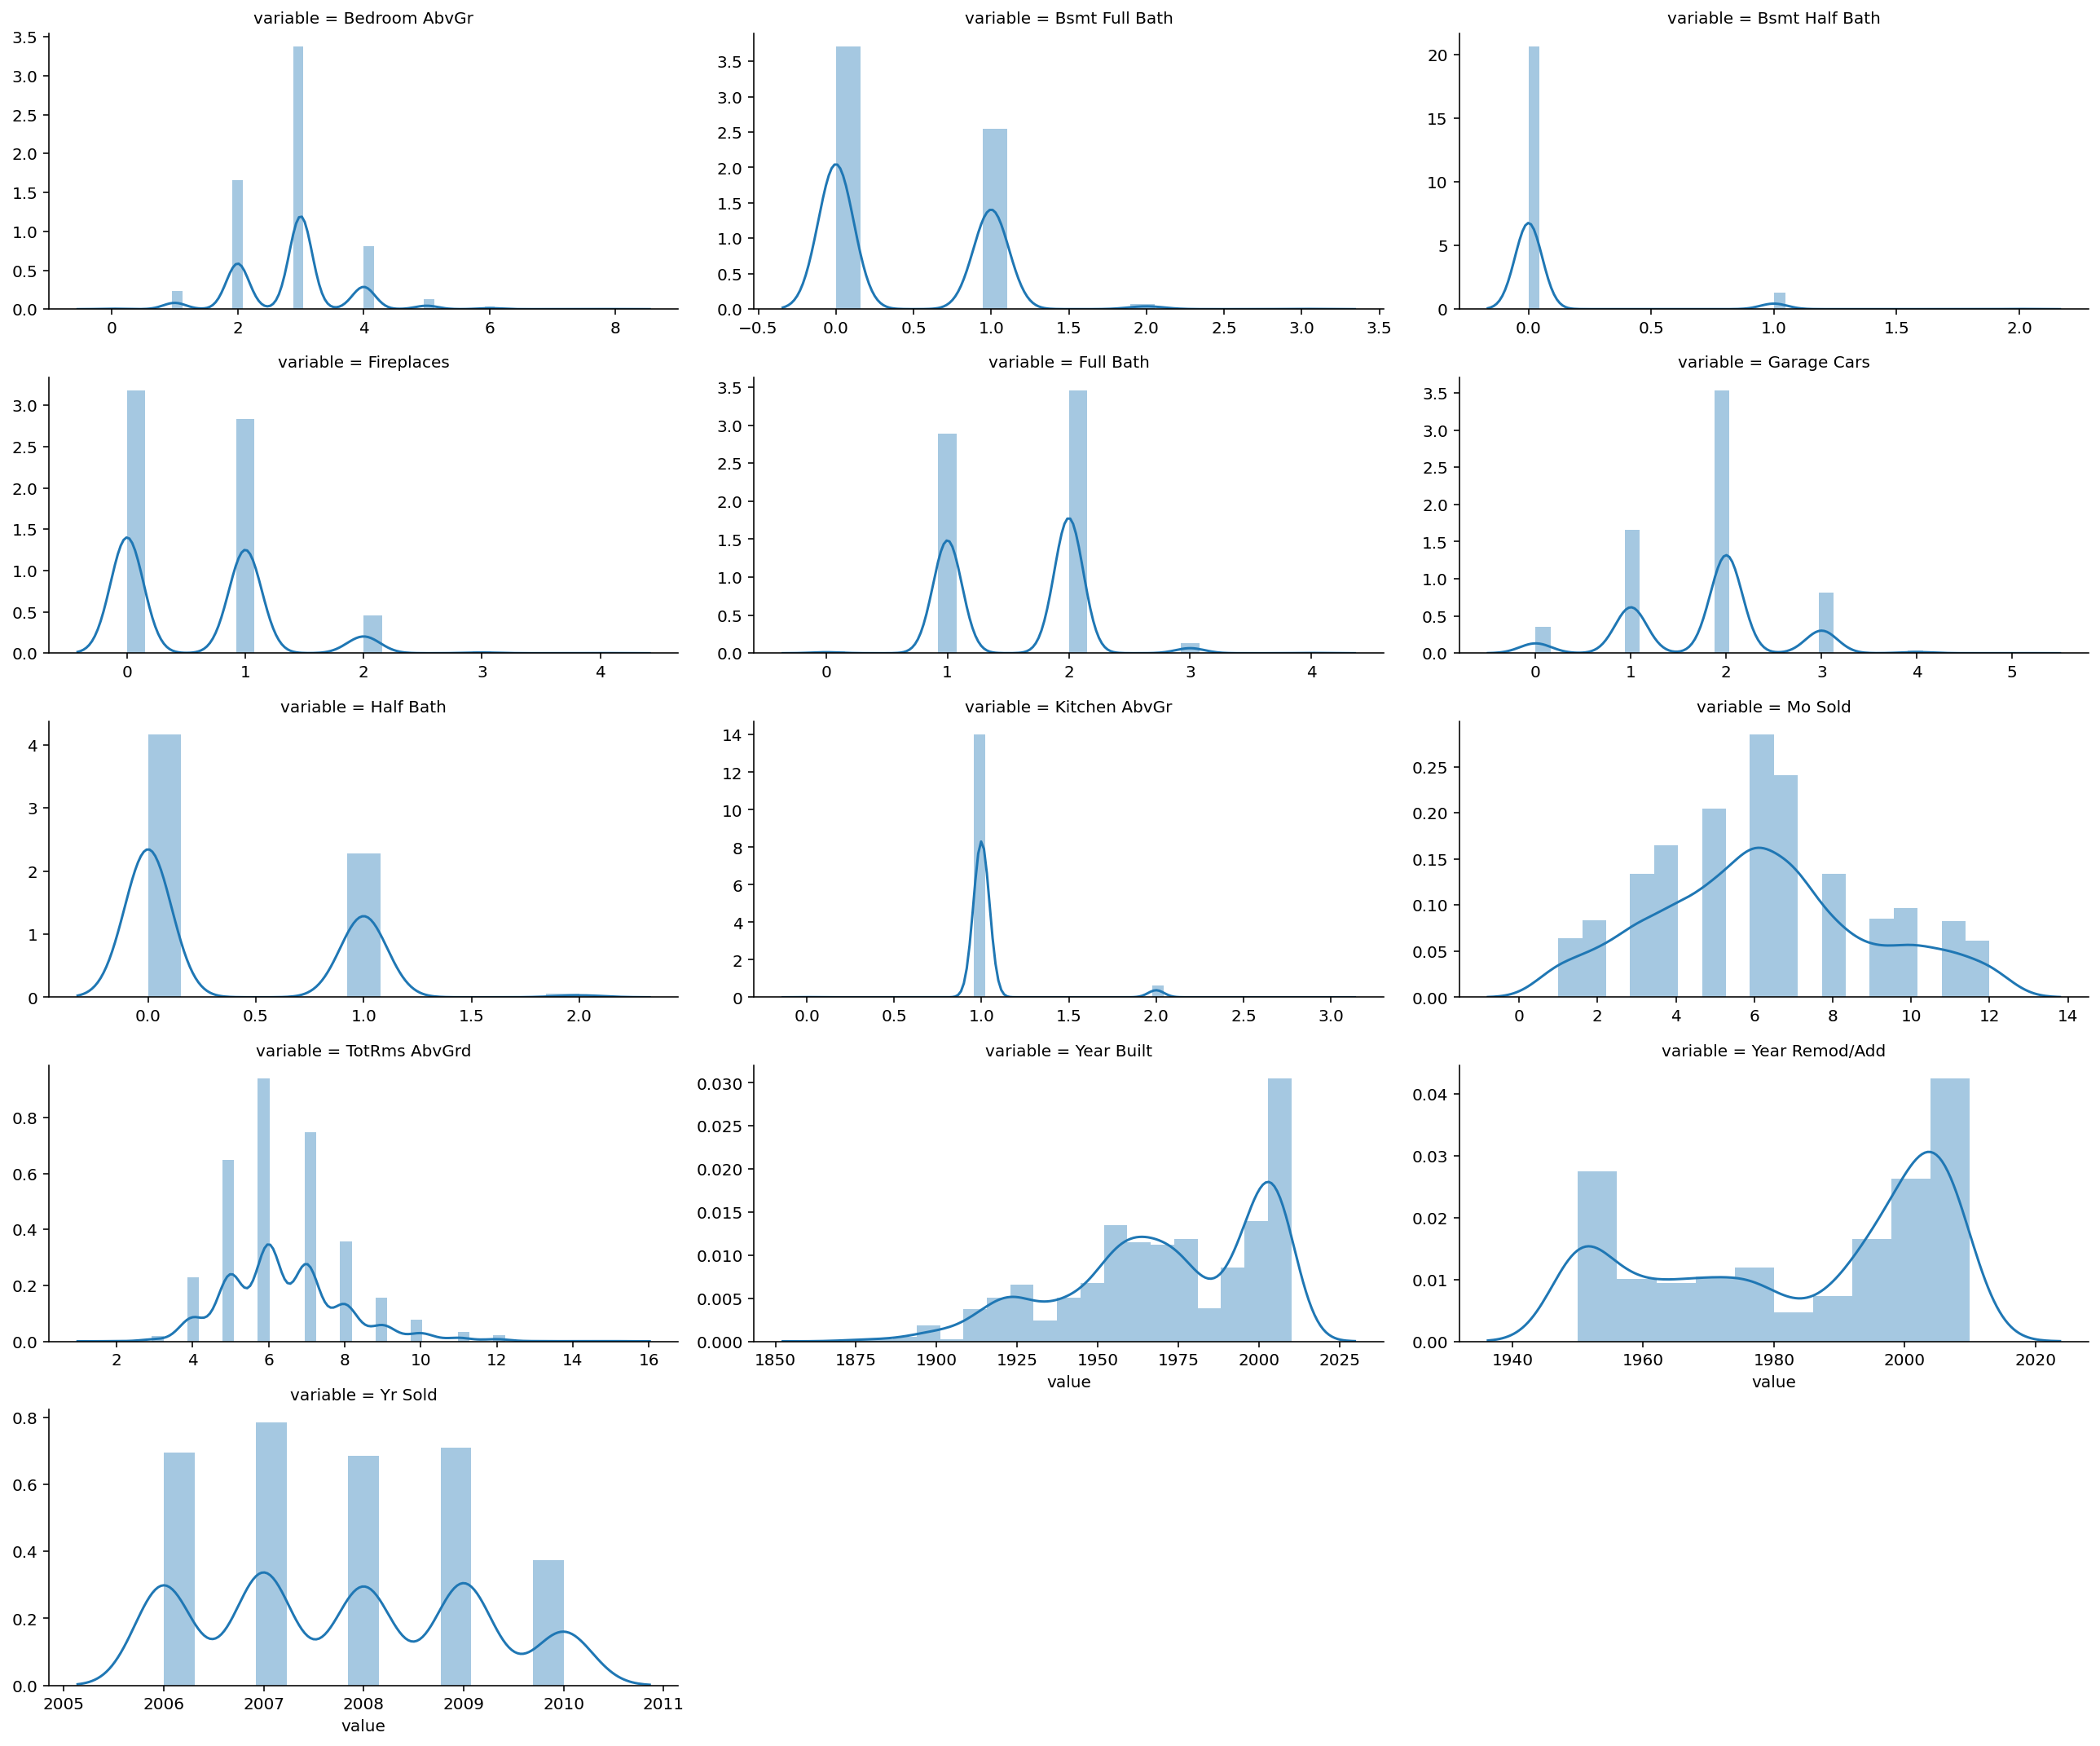

In [42]:
# Plotting distribution for discrete variables
f = pd.melt(df, value_vars = sorted(disc_cols))
g = sns.FacetGrid(data = f, col='variable', col_wrap=3, sharex = False, sharey = False, aspect=2)
#g.map_dataframe(sns.distplot, data = f, col="value")
g = g.map(sns.distplot, 'value')


[Text(0, 0.5, 'Number of house sold'),
 Text(0.5, 0, 'Year, Month'),
 Text(0.5, 1.0, 'Number of House Sold across time')]

[Text(0, 0.5, 'Median SalePrice'),
 Text(0.5, 0, 'Year, Month'),
 Text(0.5, 1.0, 'Median SalePrice across time')]

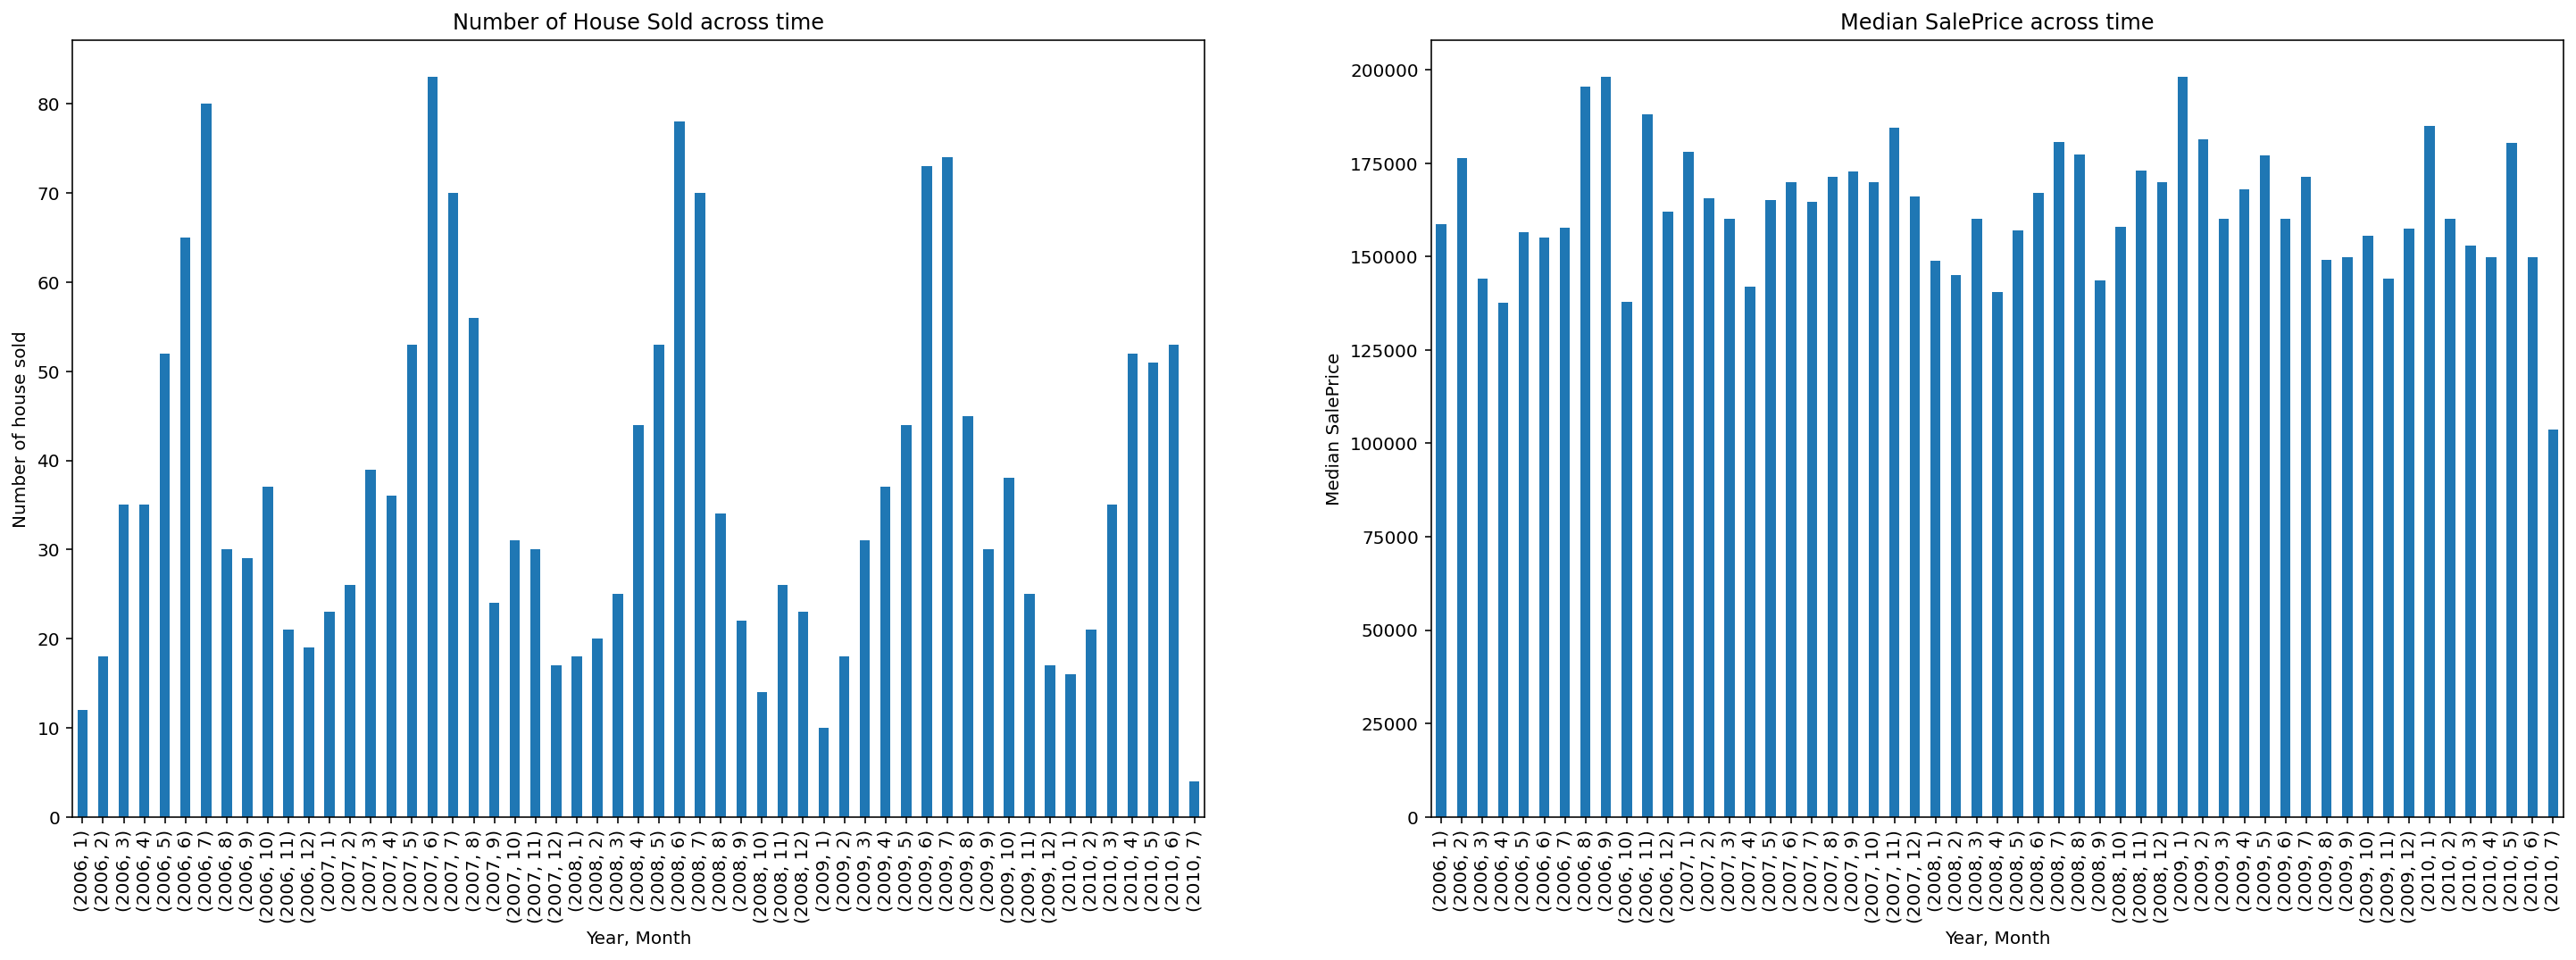

In [43]:
# plotting House Sales across time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,8))
_ = df.groupby(['Yr Sold', 'Mo Sold'])['PID'].count().plot(kind='bar', ax = ax1)
_.set(ylabel='Number of house sold',
      xlabel='Year, Month',
      title ='Number of House Sold across time')

_ = df.groupby(['Yr Sold', 'Mo Sold'])['SalePrice'].median().plot(kind='bar',ax=ax2)
_.set(ylabel='Median SalePrice',
      xlabel='Year, Month',
      title ='Median SalePrice across time')

## Feature Engineering

### Age of House / Age of Remodelling

In [44]:
df['yr_since_built'] = df['Yr Sold'] - df['Year Built']
df['yr_since_remod'] = df['Yr Sold'] - df['Year Remod/Add']

# Houses that are built in the recent 10 years
df['is_built_recently'] = np.where(df['yr_since_built'] < 11, 1, 0)

# Houses that are remodeled in the recent 10 years
df['is_remod_recently'] = np.where(df['yr_since_remod'] < 11, 1, 0)
new_cols.extend(['yr_since_built', 'yr_since_remod', 'is_built_recently', 'is_remod_recently'])

## Log Transformation
One way to transform a right-skewed distribution into a normal distribution is through log transformation \
However, log transformation is only applicable for positive values only.

In [45]:
# Log transformation only application to positive values (greater than 0)
log_cols = cont_cols + target
stats = df[log_cols].describe().T
log_cols = list(stats[stats['min'] > 0].index)
print("Variables suitable for log transformation are: \n{}".format(log_cols))

Variables suitable for log transformation are: 
['Lot Area', '1st Flr SF', 'Gr Liv Area', 'SalePrice']


In [46]:
for col in log_cols:
    X = df[[col]]
    lg_col = 'log-' + col
    df[lg_col] = np.log1p(X)

    # Update Column lists for tracking
    new_cols.append(lg_col)
    target.append(lg_col) if col in target else cont_cols.append(lg_col)

        

    
df.head()        
print(cont_cols)
print(target)

Condition 2 Garage Cond  Overall Qual Land Contour Heating  Enclosed Porch  \
0        Norm          TA             6          Lvl    GasA             0.0   
1        Norm          TA             7          Lvl    GasA             0.0   
2        Norm          TA             5          Lvl    GasA             0.0   
3        Norm          TA             5          Lvl    GasA             0.0   
4        Norm          TA             6          Lvl    GasA             0.0   

  Lot Shape  Kitchen AbvGr Garage Finish  Lot Area  ... Fireplace Qu  \
0       IR1              1           RFn   13517.0  ...           NA   
1       IR1              1           RFn   11492.0  ...           TA   
2       Reg              1           Unf    7922.0  ...           NA   
3       Reg              1           Fin    9802.0  ...           NA   
4       IR1              1           Unf   14235.0  ...           NA   

  Open Porch SF yr_since_built yr_since_remod is_built_recently  \
0          44.0             34              5                 0   
1          74.0             13             12                 0   
2          52.0             57              3                 0   
3           0.0              4              3                 1   
4          59.0            110             17                 0   

   is_remod_recently  log-Lot Area log-1st Flr SF  log-Gr Liv Area  \
0                  1      9.511777       6.587550         7.299797   
1                  0      9.349493       6.817831         7.660585   
2                  1      8.977525       6.964136         6.964136   
3                  1      9.190444       6.613384         7.275865   
4                  0      9.563529       6.723832         7.276556   

   log-SalePrice  
0      11.779136  
1      12.301387  
2      11.599112  
3      12.066816  
4      11.838633  

[5 rows x 87 columns]

['Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'log-Lot Area', 'log-1st Flr SF', 'log-Gr Liv Area']
['SalePrice', 'log-SalePrice']


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

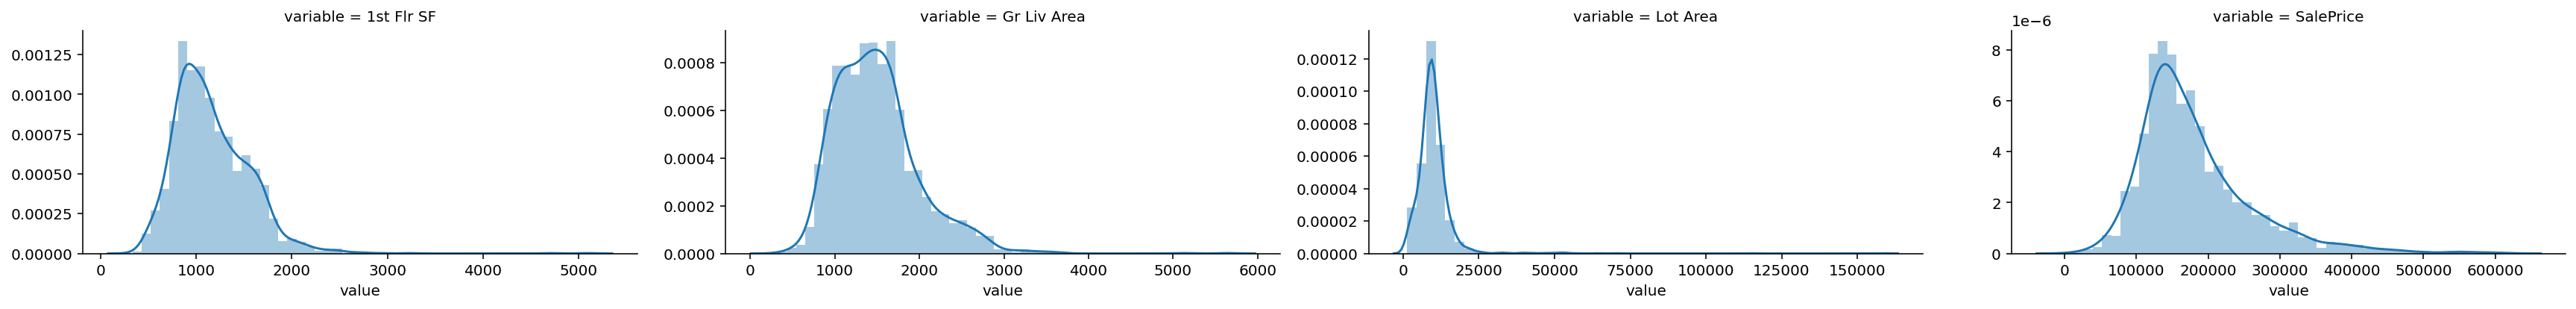

In [47]:
f = pd.melt(df, value_vars = sorted(log_cols))
g = sns.FacetGrid(data = f, col='variable', col_wrap=5, sharex = False, sharey = False, aspect=2)
#g.map_dataframe(sns.distplot, data = f, col="value")
g = g.map(sns.distplot, 'value')

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

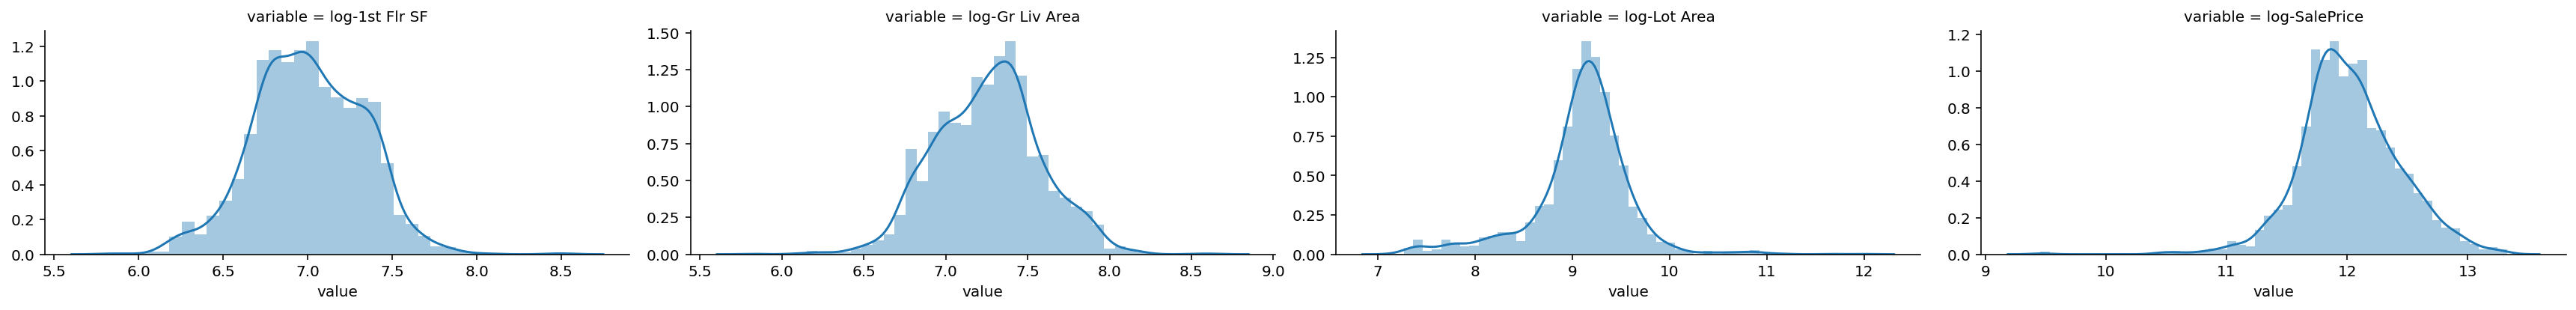

In [48]:
f = pd.melt(df, value_vars = sorted(new_cols[-4:]))
g = sns.FacetGrid(data = f, col='variable', col_wrap=5, sharex = False, sharey = False, aspect=2)
#g.map_dataframe(sns.distplot, data = f, col="value")
g = g.map(sns.distplot, 'value')

## Multicollinearity
* MultiCollinearity makes it hard to distinguish the impact what each independent variable has on the dependent variate.
* It also implies that extra repeated and redundant information is used
* This leads to inaccurate coefficents

In [49]:
cont_cols[:-3]

['Lot Area',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val']

### VIF Test
A metric for multicollinearity is Variance Inflation Facter (VIF). The higher the multicollinearty, the higher the VIF. \
General Rule to drop any variable above 5

In [50]:
test_df_bef = df[cont_cols[:-3]]
test_df_bef.columns

Index(['Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val'],
      dtype='object')

In [51]:
test_df_bef = df[cont_cols[:-3]]
# the VIF does expect a constant term in the data, so we need to add one using the add_constant method
X1 = sm.tools.add_constant(test_df_bef)
result_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
print("\n\nResults BEFORE")
print("_"*100)
display(result_before)



Results BEFORE
____________________________________________________________________________________________________


C:\Users\User\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


const              14.664316
Lot Area            1.206927
Mas Vnr Area        1.356185
BsmtFin SF 1             inf
BsmtFin SF 2             inf
Bsmt Unf SF              inf
Total Bsmt SF            inf
1st Flr SF               inf
2nd Flr SF               inf
Low Qual Fin SF          inf
Gr Liv Area              inf
Garage Area         1.614031
Wood Deck SF        1.196196
Open Porch SF       1.177639
Enclosed Porch      1.057311
3Ssn Porch          1.011142
Screen Porch        1.056500
Pool Area           1.053472
Misc Val            1.045599
dtype: float64

In [52]:
# Taking a closer look
cont_df[['1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area','Garage Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF']]

1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Garage Area  \
0          725.0       754.0              0.0       1479.0        475.0   
1          913.0      1209.0              0.0       2122.0        559.0   
2         1057.0         0.0              0.0       1057.0        246.0   
3          744.0       700.0              0.0       1444.0        400.0   
4          831.0       614.0              0.0       1445.0        484.0   
...          ...         ...              ...          ...          ...   
2017      1728.0         0.0              0.0       1728.0        520.0   
2018       861.0         0.0              0.0        861.0        539.0   
2019      1172.0       741.0              0.0       1913.0        342.0   
2020      1200.0         0.0              0.0       1200.0        294.0   
2021      1028.0       776.0              0.0       1804.0        442.0   

      BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  
0            533.0           0.0        192.0          725.0  
1            637.0           0.0        276.0          913.0  
2            731.0           0.0        326.0         1057.0  
3              0.0           0.0        384.0          384.0  
4              0.0           0.0        676.0          676.0  
...            ...           ...          ...            ...  
2017        1011.0           0.0        873.0         1884.0  
2018         262.0           0.0        599.0          861.0  
2019           0.0           0.0        896.0          896.0  
2020         155.0         750.0        295.0         1200.0  
2021           0.0           0.0        994.0          994.0  

[2022 rows x 9 columns]

In [53]:
# Confirming inear dependency
assert cont_df[cont_df['Gr Liv Area'] != cont_df['1st Flr SF'] + cont_df['2nd Flr SF']  + cont_df['Low Qual Fin SF']].shape[0] == 0
assert cont_df[cont_df['Total Bsmt SF'] != cont_df['BsmtFin SF 1'] + cont_df['BsmtFin SF 2']  + cont_df['Bsmt Unf SF']].shape[0] == 0

Given the VIF scores, one column from each group needs to be dropped

Text(0.5, 0.98, 'Scatter Plots against SalePrice for Continuous Variables')

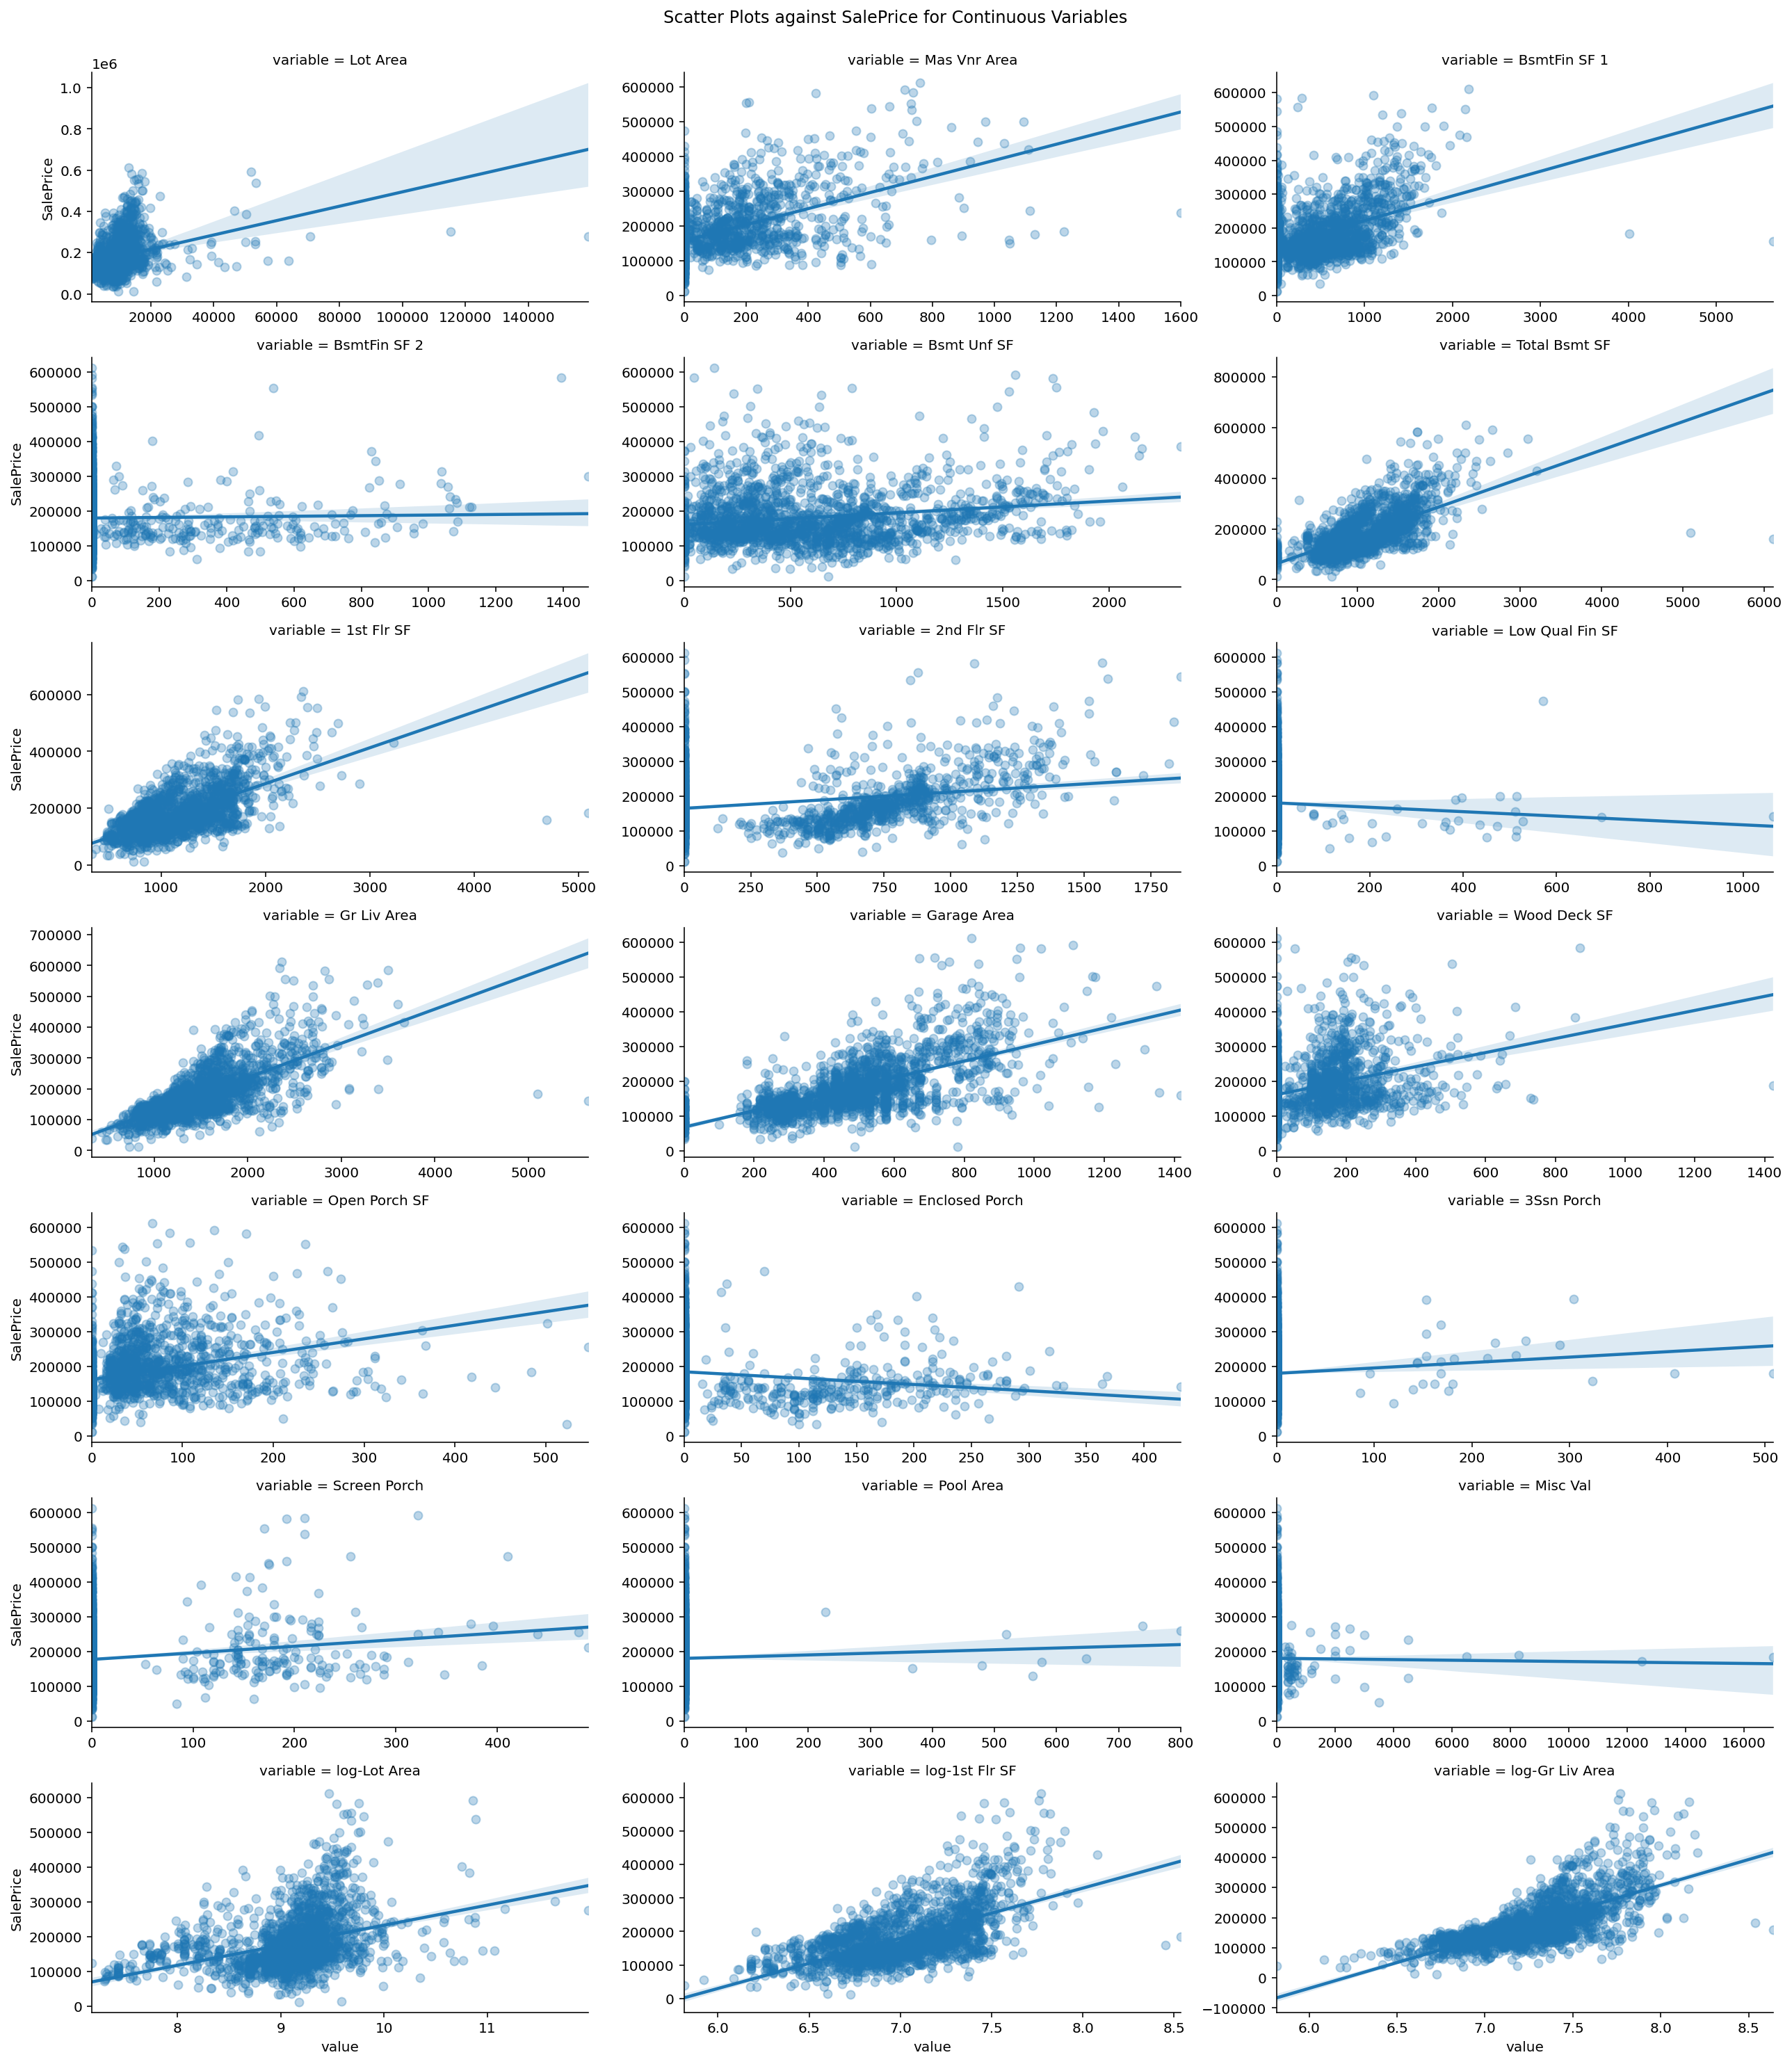

In [54]:
# Scatter Plots for Continuous Variables
f = pd.melt(df[cont_cols + target], id_vars = ['SalePrice', 'log-SalePrice'])
_ = sns.FacetGrid(data = f, col='variable', col_wrap=3, sharex = False, sharey = False, aspect=2)
#g.map_dataframe(sns.regplot, "value")
_ = _.map(sns.regplot, 'value', 'SalePrice', scatter_kws={'alpha':0.3})

# adjust spacing at the top for title
_.fig.subplots_adjust(top=0.95)

# add super title
_.fig.suptitle('Scatter Plots against SalePrice for Continuous Variables')

Text(0.5, 0.98, 'Scatter Plots against log-SalePrice for Continuous Variables')

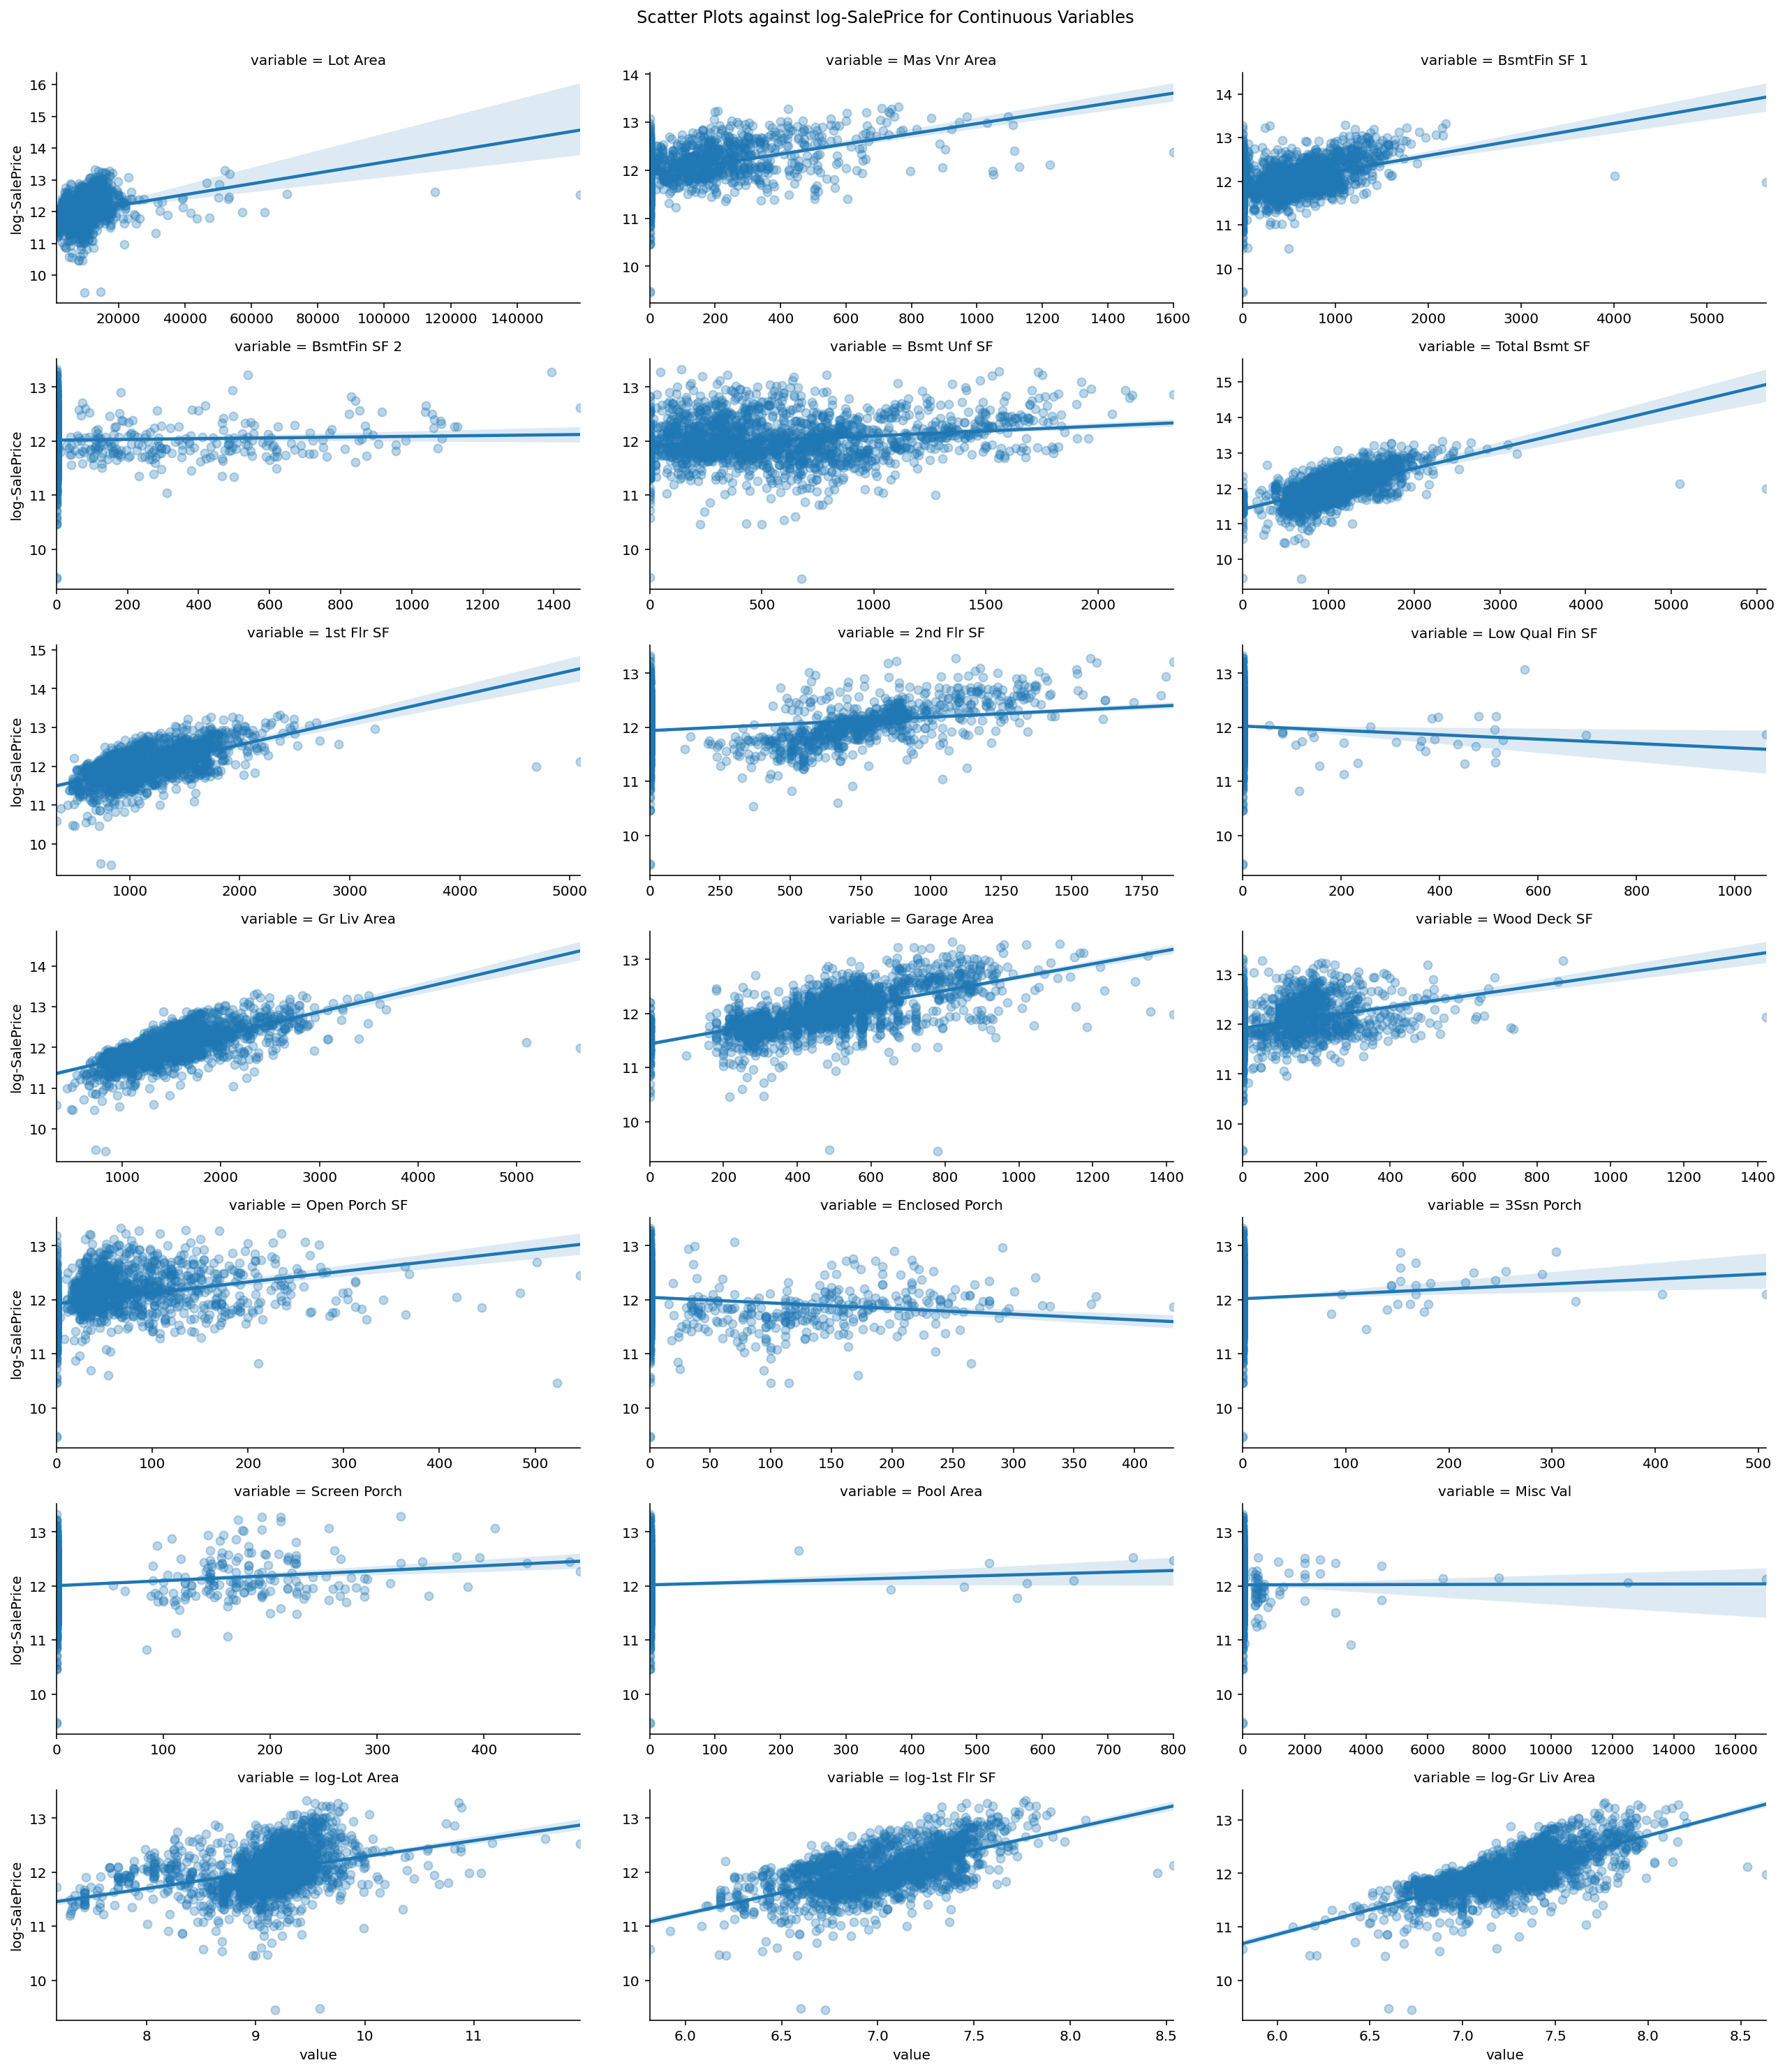

In [55]:
# Scatter Plot for continuous variables against log-SalePrice
_ = sns.FacetGrid(data = f, col='variable', col_wrap=3, sharex = False, sharey = False, aspect=2)
#g.map_dataframe(sns.regplot, "value")
_ = _.map(sns.regplot, 'value', 'log-SalePrice', scatter_kws={'alpha':0.3})

# adjust spacing at the top for title
_.fig.subplots_adjust(top=0.95)

# add super title
_.fig.suptitle('Scatter Plots against log-SalePrice for Continuous Variables')

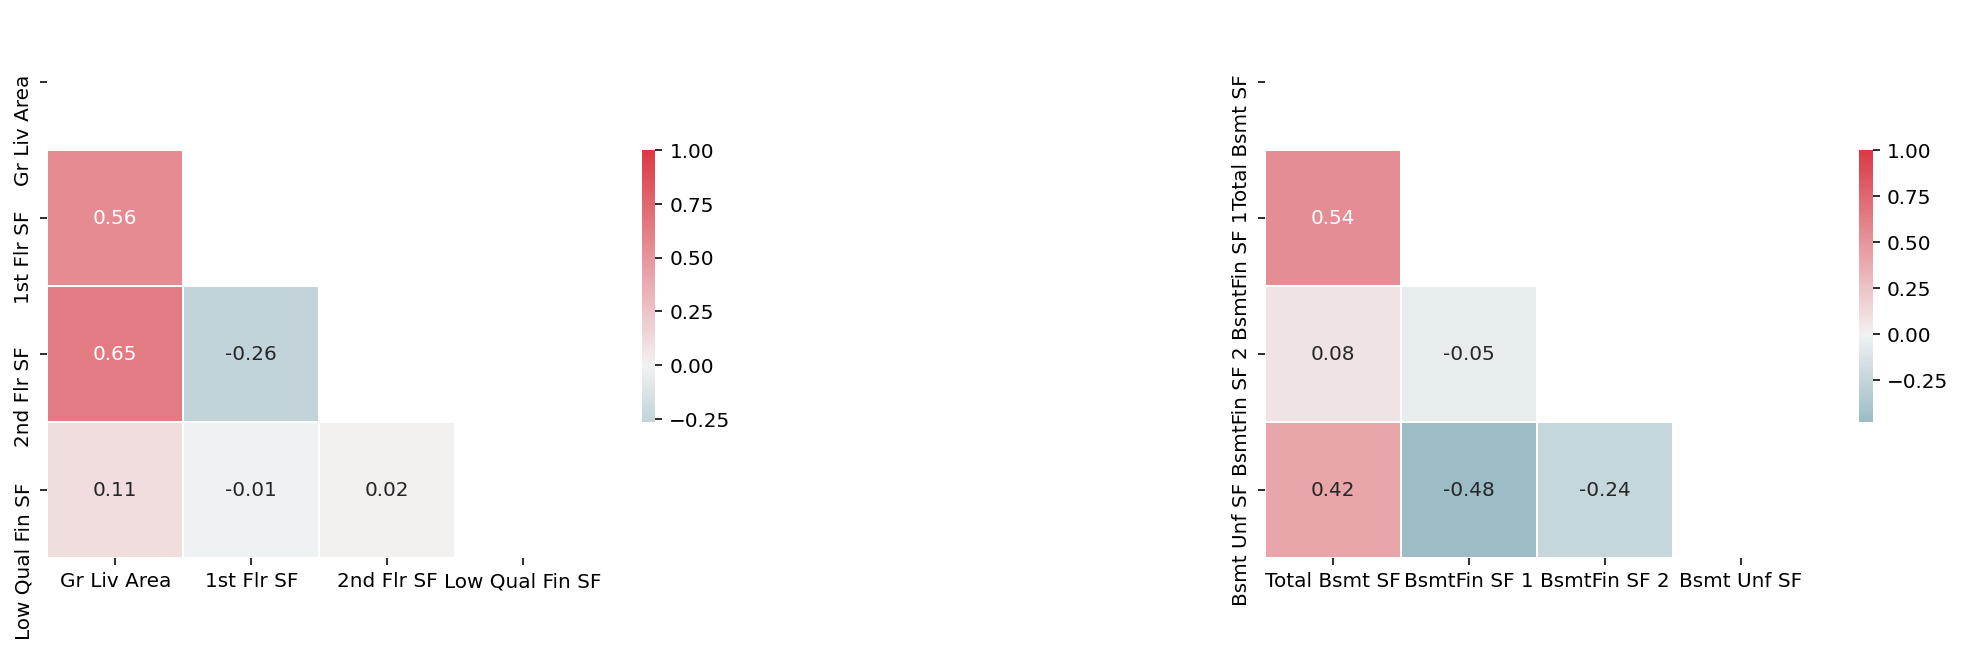

In [56]:
# Plotting heatmap
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols = 2, figsize=(20, 5))

#Get correlation figures
corr1 = df[['Gr Liv Area', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF']].corr()
corr2 = df[['Total Bsmt SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF']].corr()

# masking to remove duplicated half
mask = np.triu(np.ones_like(corr1, dtype=bool))

# select color palette
cmap = sns.diverging_palette(220, 10, as_cmap = True)

# plot heatmap
g = sns.heatmap(corr1, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, fmt='.2f',square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = ax1)
g = sns.heatmap(corr2, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, fmt='.2f',square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = ax2)

To avoid collinearity issues -> Drop Gr Liv Area & Total Bsmt SF

In [57]:
# Update lists
drop_cols.extend(['2nd Flr SF', 'BsmtFin SF 1'])
cont_cols = list(set(cont_cols) - set(drop_cols))

# Drop columns
test_df_aft = test_df_bef.drop(drop_cols, axis = 1)

# VIF Test
X2 = sm.tools.add_constant(test_df_aft)
results_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

print("\n\nResults BEFORE")
print("_"*100)
display(result_before)

print("\n\nResults AFTER")
print("_"*100)
display(results_after)




Results BEFORE
____________________________________________________________________________________________________


const              14.664316
Lot Area            1.206927
Mas Vnr Area        1.356185
BsmtFin SF 1             inf
BsmtFin SF 2             inf
Bsmt Unf SF              inf
Total Bsmt SF            inf
1st Flr SF               inf
2nd Flr SF               inf
Low Qual Fin SF          inf
Gr Liv Area              inf
Garage Area         1.614031
Wood Deck SF        1.196196
Open Porch SF       1.177639
Enclosed Porch      1.057311
3Ssn Porch          1.011142
Screen Porch        1.056500
Pool Area           1.053472
Misc Val            1.045599
dtype: float64



Results AFTER
____________________________________________________________________________________________________


const              14.664316
Lot Area            1.206927
Mas Vnr Area        1.356185
BsmtFin SF 2        1.134462
Bsmt Unf SF         1.427358
Total Bsmt SF       3.843611
1st Flr SF          3.865975
Low Qual Fin SF     1.050315
Gr Liv Area         1.911327
Garage Area         1.614031
Wood Deck SF        1.196196
Open Porch SF       1.177639
Enclosed Porch      1.057311
3Ssn Porch          1.011142
Screen Porch        1.056500
Pool Area           1.053472
Misc Val            1.045599
dtype: float64

Text(0.5, 0.98, 'Scatter Plots against SalePrice for Discrete Variables')

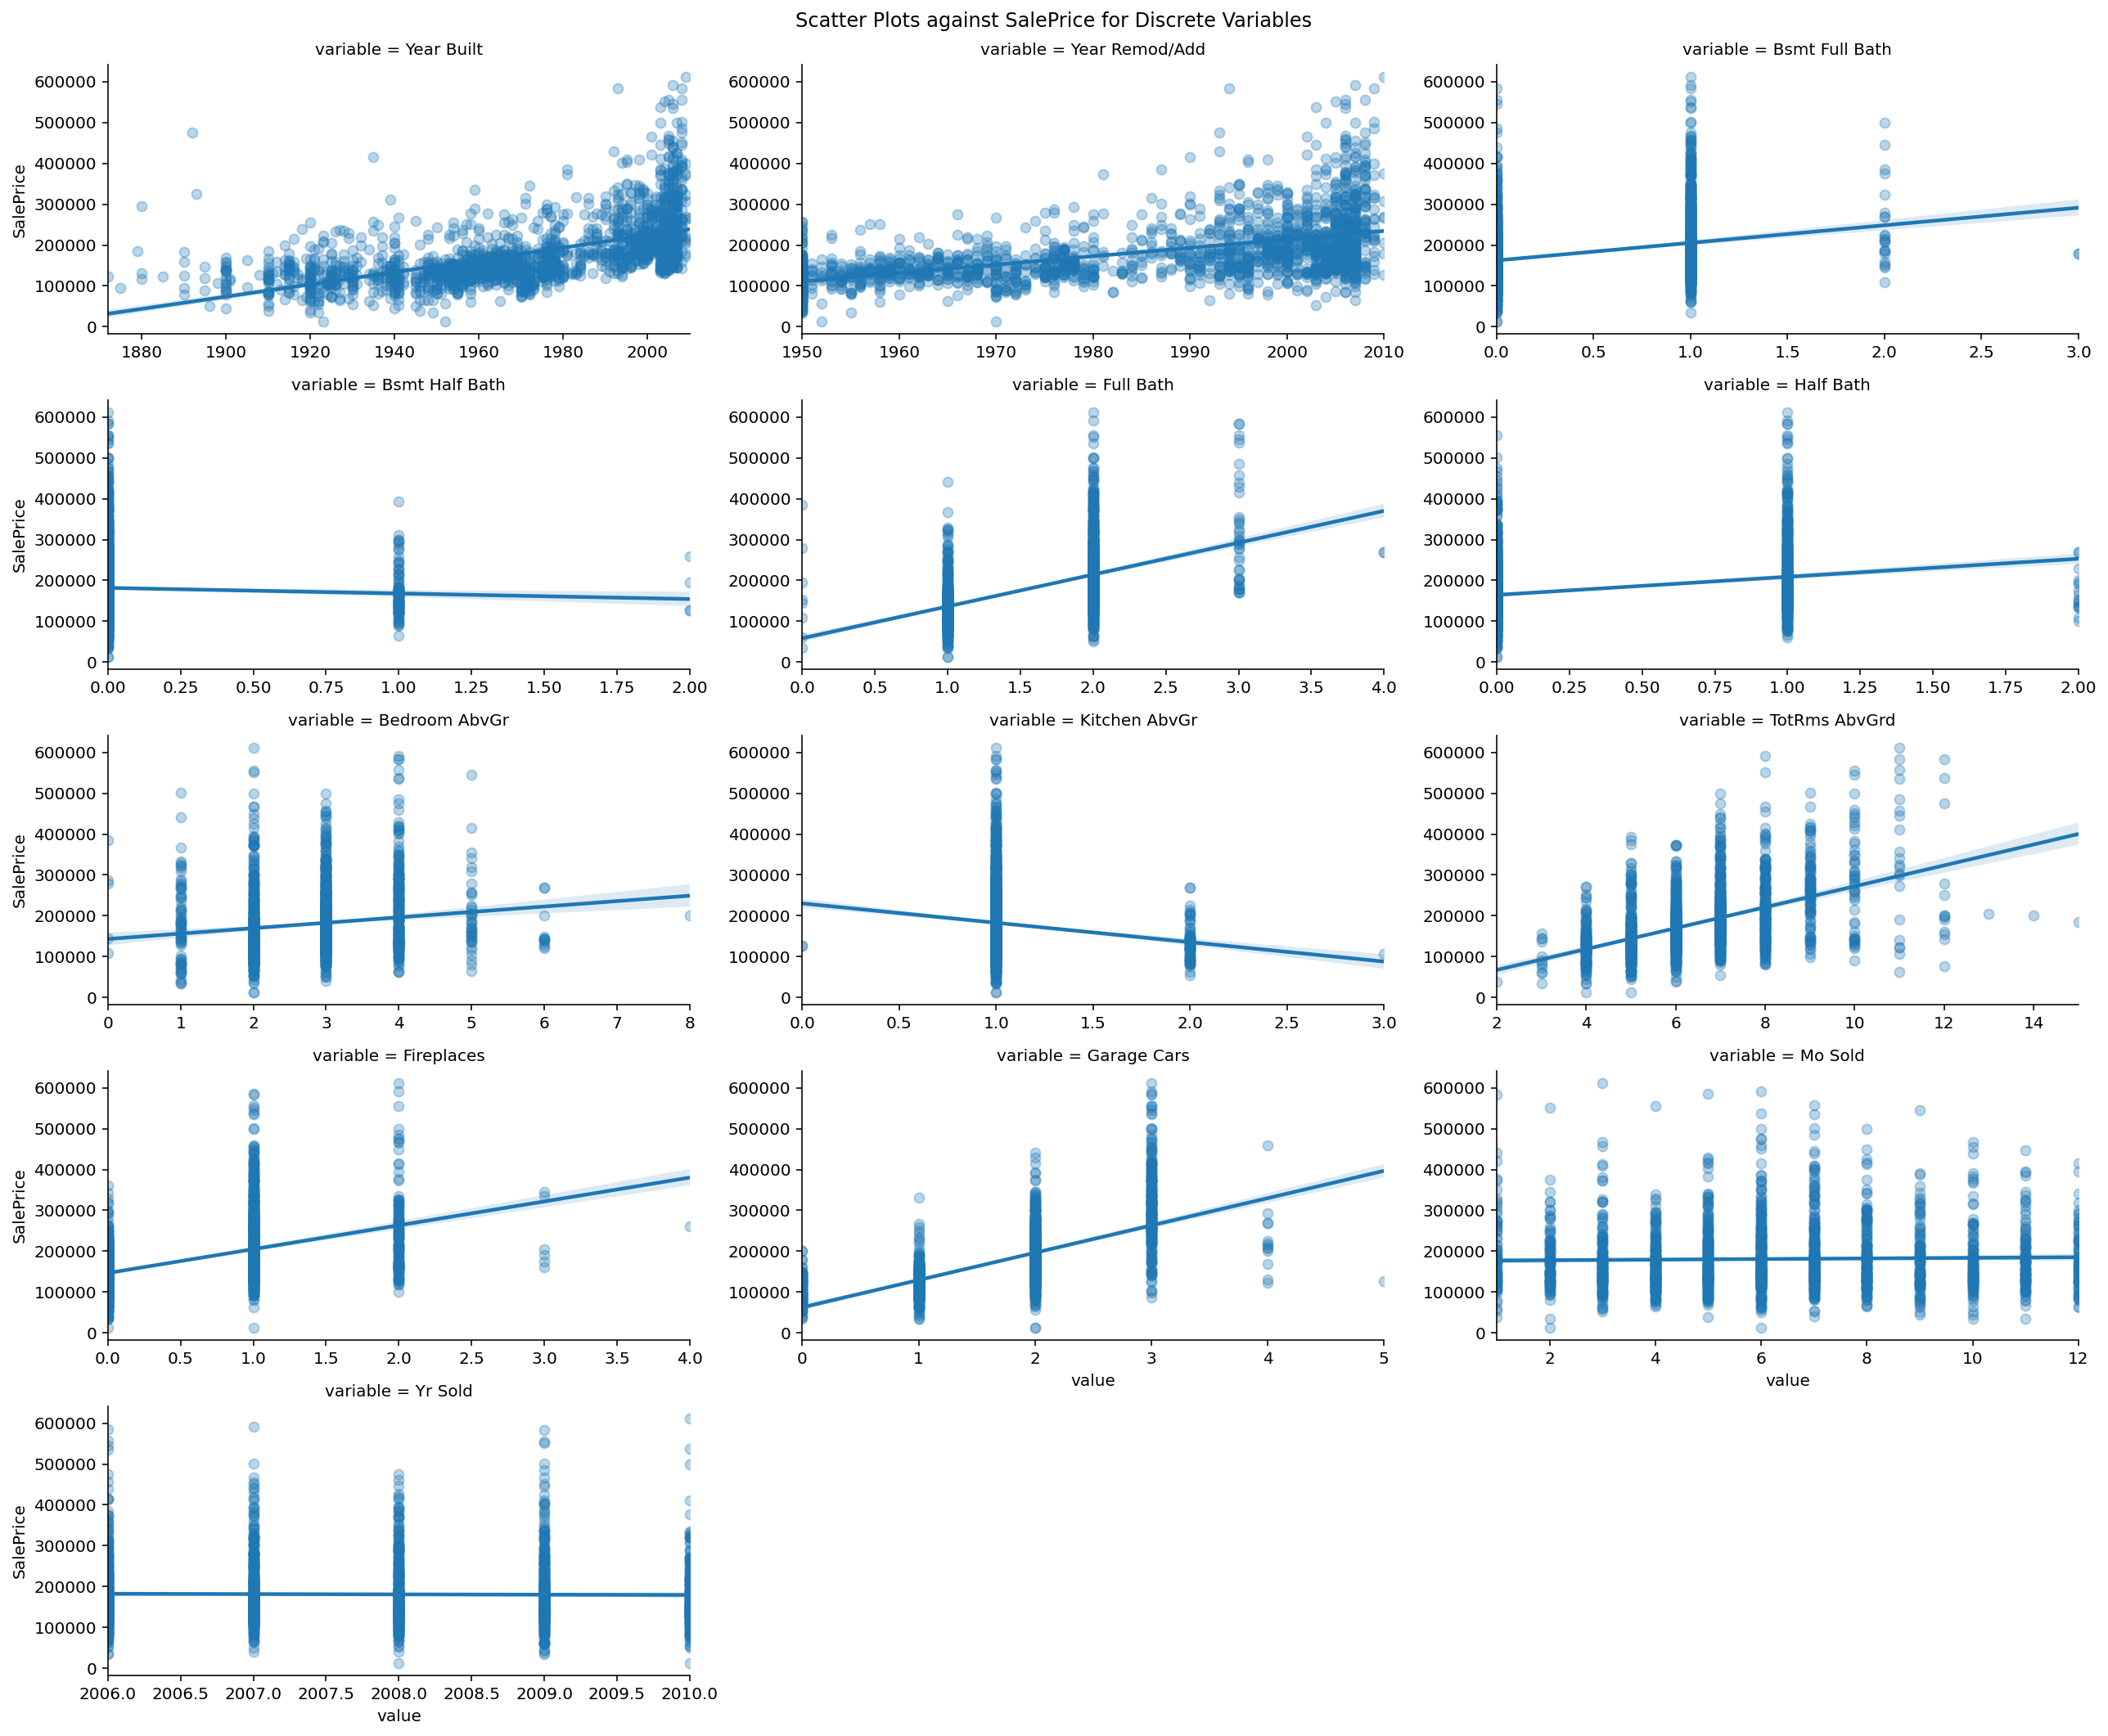

In [58]:
# plotting scatter plots for discrete variables
f = pd.melt(df[disc_cols + target], id_vars = ['SalePrice', 'log-SalePrice'])
_ = sns.FacetGrid(data = f, col='variable', col_wrap=3, sharex = False, sharey = False, aspect=2)
#g.map_dataframe(sns.regplot, "value")
_ = _.map(sns.regplot, 'value', 'SalePrice', scatter_kws={'alpha':0.3})

# adjust spacing at the top for title
_.fig.subplots_adjust(top=0.95)

# add super title
_.fig.suptitle('Scatter Plots against SalePrice for Discrete Variables')


In [59]:
disc_df.head()

Year Built  Year Remod/Add  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
0        1976            2005               0               0          2   
1        1996            1997               1               0          2   
2        1953            2007               1               0          1   
3        2006            2007               0               0          2   
4        1900            1993               0               0          2   

   Half Bath  Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd  Fireplaces  \
0          1              3              1              6           0   
1          1              4              1              8           1   
2          0              3              1              5           0   
3          1              3              1              7           0   
4          0              3              1              6           0   

   Garage Cars  Mo Sold  Yr Sold  
0            2        3     2010  
1            2        4     2009  
2            1        1     2010  
3            2        4     2010  
4            2        3     2010

In [60]:
# Unique values for each column
for item in disc_df.columns:
    print (item, ": ", disc_df[item].nunique(),"values")
    print (disc_df[item].unique(), "\n")
# df.select_dtypes(include=np.number)

Year Built :  113 values
[1976 1996 1953 2006 1900 1966 2005 1959 1952 1969 1971 1880 1999 2007
 2004 1916 1963 1977 2009 1968 2000 1992 1955 1961 1965 1937 1895 1949
 1981 1929 1995 1958 1973 1994 1978 1954 1935 1941 1931 2003 1928 1970
 1951 1920 1930 1924 1927 1960 1925 1910 2008 1915 1997 1956 1979 1964
 2001 1972 1957 1939 1962 1947 1940 1932 1967 1993 1875 1912 2010 1987
 1918 1988 1922 1926 1984 1942 1890 2002 1975 1998 1936 1938 1985 1923
 1948 1950 1980 1991 1917 1986 1946 1885 1914 1896 1983 1921 1945 1901
 1990 1974 1913 1905 1982 1919 1872 1892 1934 1879 1893 1898 1911 1908
 1989] 

Year Remod/Add :  61 values
[2005 1997 2007 1993 2002 2006 1959 1952 1969 1971 2000 1950 1963 1977
 2009 1968 1955 1961 1995 1981 1996 2008 1958 1973 1994 1965 1978 1954
 1960 2004 1970 1951 1975 1953 2001 2010 2003 1979 1964 1956 1972 1957
 1992 1962 1998 1990 1967 1985 1987 1988 1976 1984 1999 1966 1980 1989
 1991 1986 1982 1983 1974] 

Bsmt Full Bath :  4 values
[0 1 2 3] 

Bsmt Half Bath :  

In [61]:
cont_cols

['Wood Deck SF',
 'Screen Porch',
 'log-Lot Area',
 'Low Qual Fin SF',
 'Mas Vnr Area',
 'Enclosed Porch',
 'Gr Liv Area',
 'Pool Area',
 'Bsmt Unf SF',
 'log-Gr Liv Area',
 'Open Porch SF',
 'Misc Val',
 'Garage Area',
 'BsmtFin SF 2',
 '3Ssn Porch',
 'Total Bsmt SF',
 'Lot Area',
 'log-1st Flr SF',
 '1st Flr SF']

In [62]:
sorted(df.columns)

['1st Flr SF',
 '2nd Flr SF',
 '3Ssn Porch',
 'Alley',
 'Bedroom AbvGr',
 'Bldg Type',
 'Bsmt Cond',
 'Bsmt Exposure',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Bsmt Qual',
 'Bsmt Unf SF',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Central Air',
 'Condition 1',
 'Condition 2',
 'Electrical',
 'Enclosed Porch',
 'Exter Cond',
 'Exter Qual',
 'Exterior 1st',
 'Exterior 2nd',
 'Fence',
 'Fireplace Qu',
 'Fireplaces',
 'Foundation',
 'Full Bath',
 'Functional',
 'Garage Area',
 'Garage Cars',
 'Garage Cond',
 'Garage Finish',
 'Garage Qual',
 'Garage Type',
 'Gr Liv Area',
 'Half Bath',
 'Heating',
 'Heating QC',
 'House Style',
 'Id',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'Land Contour',
 'Land Slope',
 'Lot Area',
 'Lot Config',
 'Lot Shape',
 'Low Qual Fin SF',
 'MS SubClass',
 'MS Zoning',
 'Mas Vnr Area',
 'Mas Vnr Type',
 'Misc Feature',
 'Misc Val',
 'Mo Sold',
 'Neighborhood',
 'Open Porch SF',
 'Overall Cond',
 'Overall Qual',
 'PID',
 'Paved Drive',
 'P

In [63]:

df.head()

Condition 2 Garage Cond  Overall Qual Land Contour Heating  Enclosed Porch  \
0        Norm          TA             6          Lvl    GasA             0.0   
1        Norm          TA             7          Lvl    GasA             0.0   
2        Norm          TA             5          Lvl    GasA             0.0   
3        Norm          TA             5          Lvl    GasA             0.0   
4        Norm          TA             6          Lvl    GasA             0.0   

  Lot Shape  Kitchen AbvGr Garage Finish  Lot Area  ... Fireplace Qu  \
0       IR1              1           RFn   13517.0  ...           NA   
1       IR1              1           RFn   11492.0  ...           TA   
2       Reg              1           Unf    7922.0  ...           NA   
3       Reg              1           Fin    9802.0  ...           NA   
4       IR1              1           Unf   14235.0  ...           NA   

  Open Porch SF yr_since_built yr_since_remod is_built_recently  \
0          44.0             34              5                 0   
1          74.0             13             12                 0   
2          52.0             57              3                 0   
3           0.0              4              3                 1   
4          59.0            110             17                 0   

   is_remod_recently  log-Lot Area log-1st Flr SF  log-Gr Liv Area  \
0                  1      9.511777       6.587550         7.299797   
1                  0      9.349493       6.817831         7.660585   
2                  1      8.977525       6.964136         6.964136   
3                  1      9.190444       6.613384         7.275865   
4                  0      9.563529       6.723832         7.276556   

   log-SalePrice  
0      11.779136  
1      12.301387  
2      11.599112  
3      12.066816  
4      11.838633  

[5 rows x 87 columns]

In [64]:
# Exporting cleaned data for the next steps
df.to_csv('transformed_data part 1.csv',index=False)

In [65]:
# Storing lists as json
col_dict = dict(
    INDEX = idx_cols, 
    TARGET = target,
    CONTINUOUS = cont_cols,
    DISCRETE = disc_cols,
    NOMINAL = nom_cols,
    ORDINAL = ord_cols,
    NEW = new_cols,
    DROPPED = drop_cols,
    LOW_VARIANCE = low_var_cols)
print(col_dict)

{'INDEX': ['Id', 'PID'], 'TARGET': ['SalePrice', 'log-SalePrice'], 'CONTINUOUS': ['Wood Deck SF', 'Screen Porch', 'log-Lot Area', 'Low Qual Fin SF', 'Mas Vnr Area', 'Enclosed Porch', 'Gr Liv Area', 'Pool Area', 'Bsmt Unf SF', 'log-Gr Liv Area', 'Open Porch SF', 'Misc Val', 'Garage Area', 'BsmtFin SF 2', '3Ssn Porch', 'Total Bsmt SF', 'Lot Area', 'log-1st Flr SF', '1st Flr SF'], 'DISCRETE': ['Year Built', 'Year Remod/Add', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Mo Sold', 'Yr Sold'], 'NOMINAL': ['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Electrical', 'Garage Type', 'Garage Finish', 'Paved Drive', 'Fence', 'Misc Feature', 'Sale Type'], 'ORDINAL': ['Lot Shape', 'Utili

In [66]:
# Writing lists to file
with open('columns v0.2.txt', 'w', encoding='utf-8') as f:
    json.dump(col_dict, f)

In [67]:
new_cols

['yr_since_built',
 'yr_since_remod',
 'is_built_recently',
 'is_remod_recently',
 'log-Lot Area',
 'log-1st Flr SF',
 'log-Gr Liv Area',
 'log-SalePrice']

In [68]:
sorted(df.columns)

['1st Flr SF',
 '2nd Flr SF',
 '3Ssn Porch',
 'Alley',
 'Bedroom AbvGr',
 'Bldg Type',
 'Bsmt Cond',
 'Bsmt Exposure',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Bsmt Qual',
 'Bsmt Unf SF',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Central Air',
 'Condition 1',
 'Condition 2',
 'Electrical',
 'Enclosed Porch',
 'Exter Cond',
 'Exter Qual',
 'Exterior 1st',
 'Exterior 2nd',
 'Fence',
 'Fireplace Qu',
 'Fireplaces',
 'Foundation',
 'Full Bath',
 'Functional',
 'Garage Area',
 'Garage Cars',
 'Garage Cond',
 'Garage Finish',
 'Garage Qual',
 'Garage Type',
 'Gr Liv Area',
 'Half Bath',
 'Heating',
 'Heating QC',
 'House Style',
 'Id',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'Land Contour',
 'Land Slope',
 'Lot Area',
 'Lot Config',
 'Lot Shape',
 'Low Qual Fin SF',
 'MS SubClass',
 'MS Zoning',
 'Mas Vnr Area',
 'Mas Vnr Type',
 'Misc Feature',
 'Misc Val',
 'Mo Sold',
 'Neighborhood',
 'Open Porch SF',
 'Overall Cond',
 'Overall Qual',
 'PID',
 'Paved Drive',
 'P

## Normalization

In [69]:
# ss = StandardScaler()

# # Scaling the continuous variables
# scaler = ss.fit(df[cont_cols])    # Compute the mean and std to be used for later scaling.
# cont_df_arr = scaler.transform(df[cont_cols]) # Perform standardization by centering and scaling

# cont_cols_ss = [col + '_ss' for col in cont_cols]
# cont_df_ss = pd.DataFrame(cont_df_arr, columns=cont_cols_ss)
# display(cont_df_ss.head())
# display(pd.DataFrame([scaler.mean_, scaler.var_], columns=cont_cols, index=['mean', 'variance']).T)


In [70]:
# # Scaling the discrete variables
# scaler = ss.fit(df[disc_cols])    # Compute the mean and std to be used for later scaling.
# disc_df_arr = scaler.transform(df[disc_cols]) # Perform standardization by centering and scaling

# disc_cols_ss = [col + '_ss' for col in disc_cols]
# disc_df_ss = pd.DataFrame(disc_df_arr, columns=disc_cols_ss)
# display(disc_df_ss.head())
# display(pd.DataFrame([scaler.mean_, scaler.var_], columns=disc_cols, index=['mean', 'variance']).T)


# df = pd.concat([df, cont_df_ss, disc_df_ss], axis=1)
# df.head()